
# Lead Scoring Case Study
### Identification of perspective Leads to focus more on them and thus enhancing the conversion ratio

## Business Objective
#### We are required to categorize or cluster the leads into two groups. First group shall contain the leads who can be converted to customers and the other group who are leads but not converted to customers. This will be done by analysing past data provided by X Education Company so that employee of the education company can focus on targetting a higher conversion rate of 80% or more.



In [49]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [55]:
# Importing Libraries & Files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Improving presentation aspect

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Improving HTML Display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Setting Pandas option
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth',255)
pd.set_option('display.max_info_columns',200)
pd.set_option('display.max_info_rows',200)
pd.set_option('display.width',200)
pd.set_option('display.html.border',1)

# Loading the data from csv and analyzing


In [3]:
# In Order to run locally
leadscore_data = pd.read_csv("Leads.csv")
leadscore_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:

# Overview of Dataframe (Shape, Datatype)
leadscore_data.shape

(9240, 37)

In [5]:
# Overview of the data types of the columns in this data columns
leadscore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   Prospect ID                                    object 
 1   Lead Number                                    int64  
 2   Lead Origin                                    object 
 3   Lead Source                                    object 
 4   Do Not Email                                   object 
 5   Do Not Call                                    object 
 6   Converted                                      int64  
 7   TotalVisits                                    float64
 8   Total Time Spent on Website                    int64  
 9   Page Views Per Visit                           float64
 10  Last Activity                                  object 
 11  Country                                        object 
 12  Specialization                                 o

In [6]:
# Finding the null values in the data set
leadscore_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Converting the same into percentage
round(100*(leadscore_data.isnull().sum()/len(leadscore_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Conversion Rate for past orders
round(len(leadscore_data[leadscore_data['Converted']==1].index)/len(leadscore_data.index)*100,2)

38.54

### Data Cleaning 

In [9]:
# Dropping duplicate rows
leadscore_data=leadscore_data.drop_duplicates()

In [10]:
# Replacing the value 'Select' with 'NaN' since 'Select' indicates that the person who filled the form kept it unselected
leadscore_data = leadscore_data.replace('Select', np.nan)
print('Percentage of null values per column')
round(100*(leadscore_data.isnull().sum()/len(leadscore_data.index)),2)

Percentage of null values per column


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Making list of un-usable columns, due to most NaN value (Taking an arbitrary value >20 %)
unnecessary_column = set((pd.isnull(leadscore_data).sum()/len(leadscore_data.index) > .2).index)
unnecessary_column

{'A free copy of Mastering The Interview',
 'Asymmetrique Activity Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Index',
 'Asymmetrique Profile Score',
 'City',
 'Converted',
 'Country',
 'Digital Advertisement',
 'Do Not Call',
 'Do Not Email',
 'Get updates on DM Content',
 'How did you hear about X Education',
 'I agree to pay the amount through cheque',
 'Last Activity',
 'Last Notable Activity',
 'Lead Number',
 'Lead Origin',
 'Lead Profile',
 'Lead Quality',
 'Lead Source',
 'Magazine',
 'Newspaper',
 'Newspaper Article',
 'Page Views Per Visit',
 'Prospect ID',
 'Receive More Updates About Our Courses',
 'Search',
 'Specialization',
 'Tags',
 'Through Recommendations',
 'Total Time Spent on Website',
 'TotalVisits',
 'Update me on Supply Chain Content',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'X Education Forums'}

In [12]:
# Making list of un-necessary columns from Analysis point of view
unnecessary_column = {'Prospect ID', 'Lead Number'}

### These three columns are very important from the analysis standpoint

In [13]:
# Making list of numerical columns from Analysis point of view
numerical_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}
numerical_column

{'Page Views Per Visit', 'Total Time Spent on Website', 'TotalVisits'}

In [14]:
# Making list of categorical columns from Analysis point of view
categorical_column = {'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                      'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                      'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'}

categorical_column

{'A free copy of Mastering The Interview',
 'Digital Advertisement',
 'Do Not Call',
 'Do Not Email',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Last Activity',
 'Last Notable Activity',
 'Lead Origin',
 'Lead Source',
 'Magazine',
 'Newspaper',
 'Newspaper Article',
 'Receive More Updates About Our Courses',
 'Search',
 'Through Recommendations',
 'Update me on Supply Chain Content',
 'X Education Forums'}

In [15]:
# Making list of Target/Output column from Analysis point of view
target_column = {'Converted'}

In [16]:
# We are dropping un-usable and un-necessary columns
leadscore_data = leadscore_data[list(numerical_column | categorical_column | target_column)]

# We will fetch % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(leadscore_data.isnull().sum()/len(leadscore_data.index)),2)

Percentage of null values per column


Converted                                   0.00
Search                                      0.00
TotalVisits                                 1.48
I agree to pay the amount through cheque    0.00
Digital Advertisement                       0.00
X Education Forums                          0.00
Lead Source                                 0.39
Do Not Call                                 0.00
Do Not Email                                0.00
Get updates on DM Content                   0.00
Newspaper                                   0.00
A free copy of Mastering The Interview      0.00
Lead Origin                                 0.00
Magazine                                    0.00
Last Activity                               1.11
Receive More Updates About Our Courses      0.00
Total Time Spent on Website                 0.00
Newspaper Article                           0.00
Through Recommendations                     0.00
Update me on Supply Chain Content           0.00
Last Notable Activit

In [17]:
# Further removing the columns which have very less variation in data
leadscore_data[list(categorical_column)].describe()

,Get updates on DM Content,Newspaper,A free copy of Mastering The Interview,Lead Origin,Magazine,Last Activity,Search,Receive More Updates About Our Courses,I agree to pay the amount through cheque,Newspaper Article,X Education Forums,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Lead Source,Last Notable Activity,Do Not Call,Do Not Email
count,9240,9240,9240,9240,9240,9137,9240,9240,9240,9240,9240,9240,9240,9240,9204,9240,9240,9240
unique,1,2,2,5,1,17,2,1,1,2,2,2,2,1,21,16,2,2
top,No,No,No,Landing Page Submission,No,Email Opened,No,No,No,No,No,No,No,No,Google,Modified,No,No
freq,9240,9239,6352,4886,9240,3437,9226,9240,9240,9238,9239,9236,9233,9240,2868,3407,9238,8506


In [18]:
unnecessary_column.add('Get updates on DM Content')
unnecessary_column.add('Newspaper Article')
unnecessary_column.add('Magazine')
unnecessary_column.add('I agree to pay the amount through cheque')
unnecessary_column.add('Update me on Supply Chain Content')
unnecessary_column.add('Newspaper')
unnecessary_column.add('Through Recommendations')
unnecessary_column.add('Search')
unnecessary_column.add('Do Not Call')
unnecessary_column.add('Digital Advertisement')
unnecessary_column.add('X Education Forums')
# Dropping un-usable and un-necessary columns
leadscore_data = leadscore_data[list(numerical_column | categorical_column | target_column)]


In [19]:
# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(leadscore_data.isnull().sum()/len(leadscore_data.index)),2)

Percentage of null values per column


Converted                                   0.00
Search                                      0.00
TotalVisits                                 1.48
I agree to pay the amount through cheque    0.00
Digital Advertisement                       0.00
X Education Forums                          0.00
Lead Source                                 0.39
Do Not Call                                 0.00
Do Not Email                                0.00
Get updates on DM Content                   0.00
Newspaper                                   0.00
A free copy of Mastering The Interview      0.00
Lead Origin                                 0.00
Magazine                                    0.00
Last Activity                               1.11
Receive More Updates About Our Courses      0.00
Total Time Spent on Website                 0.00
Newspaper Article                           0.00
Through Recommendations                     0.00
Update me on Supply Chain Content           0.00
Last Notable Activit

### Cleaning of data row wise

In [20]:
# Dropping rows with most NaN value (Taking an arbitrary value >20 %)
threshold = int(.2*len(leadscore_data.columns))
leadscore_data.dropna(thresh=2, inplace=True)

In [21]:
# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(leadscore_data.isnull().sum()/len(leadscore_data.index)),5)

Percentage of null values per column


Converted                                   0.00000
Search                                      0.00000
TotalVisits                                 1.48268
I agree to pay the amount through cheque    0.00000
Digital Advertisement                       0.00000
X Education Forums                          0.00000
Lead Source                                 0.38961
Do Not Call                                 0.00000
Do Not Email                                0.00000
Get updates on DM Content                   0.00000
Newspaper                                   0.00000
A free copy of Mastering The Interview      0.00000
Lead Origin                                 0.00000
Magazine                                    0.00000
Last Activity                               1.11472
Receive More Updates About Our Courses      0.00000
Total Time Spent on Website                 0.00000
Newspaper Article                           0.00000
Through Recommendations                     0.00000
Update me on

In [22]:
#  Categorical Columns
leadscore_data[list(categorical_column)].describe()

,Get updates on DM Content,Newspaper,A free copy of Mastering The Interview,Lead Origin,Magazine,Last Activity,Search,Receive More Updates About Our Courses,I agree to pay the amount through cheque,Newspaper Article,X Education Forums,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Lead Source,Last Notable Activity,Do Not Call,Do Not Email
count,9240,9240,9240,9240,9240,9137,9240,9240,9240,9240,9240,9240,9240,9240,9204,9240,9240,9240
unique,1,2,2,5,1,17,2,1,1,2,2,2,2,1,21,16,2,2
top,No,No,No,Landing Page Submission,No,Email Opened,No,No,No,No,No,No,No,No,Google,Modified,No,No
freq,9240,9239,6352,4886,9240,3437,9226,9240,9240,9238,9239,9236,9233,9240,2868,3407,9238,8506


In [23]:
# 'Last Activity' have 1.33841 % 'NaN' values
# Imputing values for 'Last Activity'
# Replacing 'NaN' with 'Email Opened'
leadscore_data[['Last Activity']]=leadscore_data[['Last Activity']].fillna(value='Email Opened')

# 'Lead Source' have 0.34116 % 'NaN' values
# Imputing values for 'Lead Source'
# Replacing 'NaN' with 'Google'
leadscore_data[['Lead Source']]=leadscore_data[['Lead Source']].fillna(value='Google')

In [24]:
# Observing Numeric Columns
leadscore_data[list(numerical_column)].describe()

,Total Time Spent on Website,Page Views Per Visit,TotalVisits
count,9240.000000,9103.000000,9103.000000
mean,487.698268,2.362820,3.445238
std,548.021466,2.161418,4.854853
min,0.000000,0.000000,0.000000
25%,12.000000,1.000000,1.000000
50%,248.000000,2.000000,3.000000
75%,936.000000,3.000000,5.000000
max,2272.000000,55.000000,251.000000


In [25]:
# We are imputing 'Page Views Per Visit','TotalVisits' with Mean, since the amount of missing data is less (< 2%) and variation in data is low.
leadscore_data[['Page Views Per Visit']]=leadscore_data[['Page Views Per Visit']].fillna(value=leadscore_data[['Page Views Per Visit']].mean())
leadscore_data[['TotalVisits']]=leadscore_data[['TotalVisits']].fillna(value=leadscore_data[['TotalVisits']].mean())

In [26]:

# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(leadscore_data.isnull().sum()/len(leadscore_data.index)),5)

Percentage of null values per column


Converted                                   0.0
Search                                      0.0
TotalVisits                                 0.0
I agree to pay the amount through cheque    0.0
Digital Advertisement                       0.0
X Education Forums                          0.0
Lead Source                                 0.0
Do Not Call                                 0.0
Do Not Email                                0.0
Get updates on DM Content                   0.0
Newspaper                                   0.0
A free copy of Mastering The Interview      0.0
Lead Origin                                 0.0
Magazine                                    0.0
Last Activity                               0.0
Receive More Updates About Our Courses      0.0
Total Time Spent on Website                 0.0
Newspaper Article                           0.0
Through Recommendations                     0.0
Update me on Supply Chain Content           0.0
Last Notable Activity                   

In [27]:
# Shape of new Dataframe
leadscore_data.shape

(9240, 22)

### Exploratory Data Analysis

In [28]:
def num_col_univariate_analysis(c):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(y=c, data=leadscore_data)
  plt.show()

In [29]:
def cat_col_univariate_analysis(c):
  sns.catplot(y=c, data=leadscore_data, kind="count")
  plt.show()

In [30]:
def num_col_bivariate_analysis(c1,c2):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(x=c1, y=c2, data=leadscore_data)
  plt.show()

In [31]:
def cat_col_bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=leadscore_data, kind="count")
  plt.show()

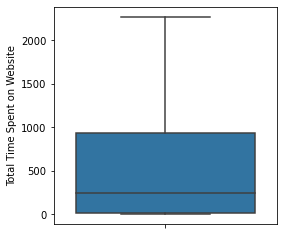

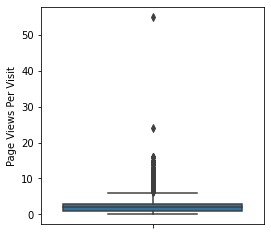

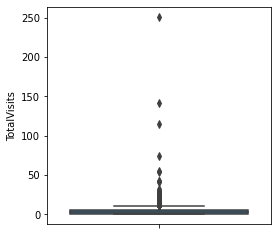

In [32]:
# Univariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_univariate_analysis(c)

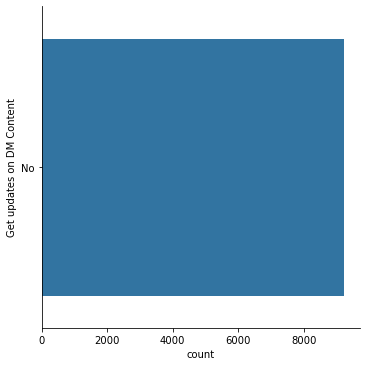

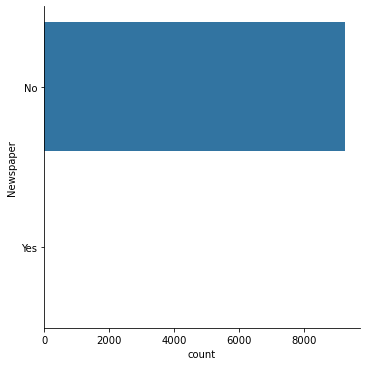

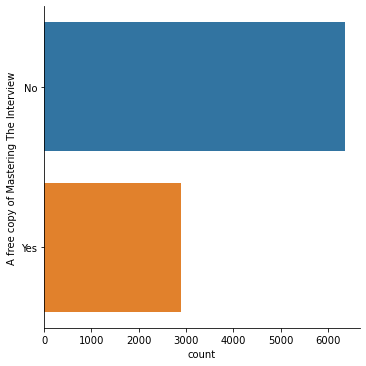

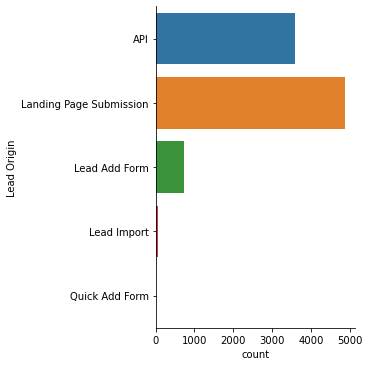

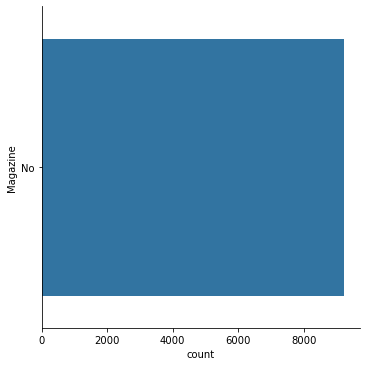

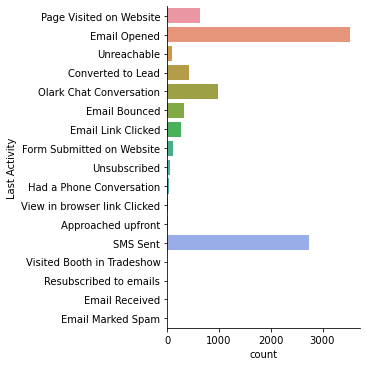

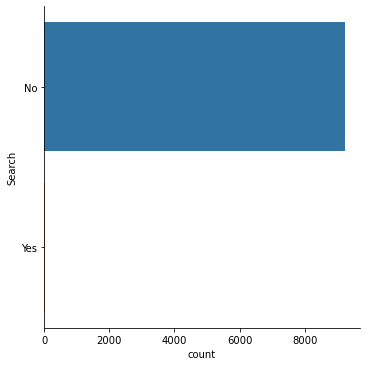

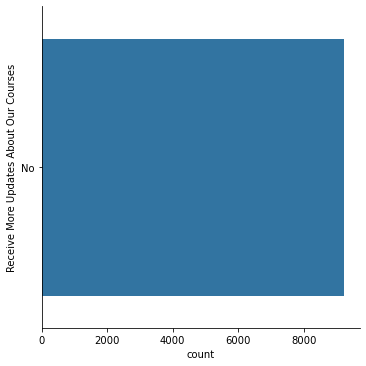

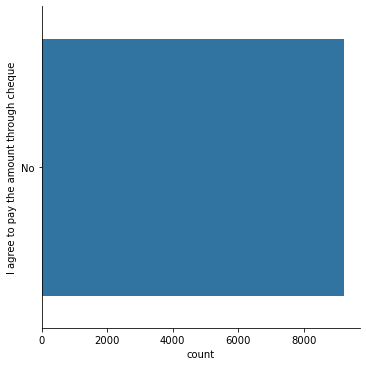

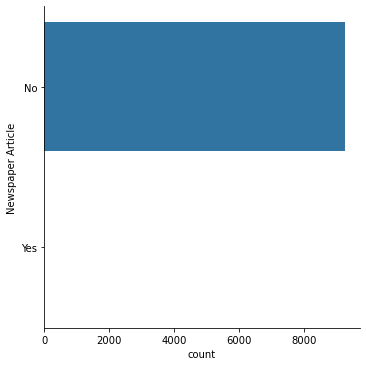

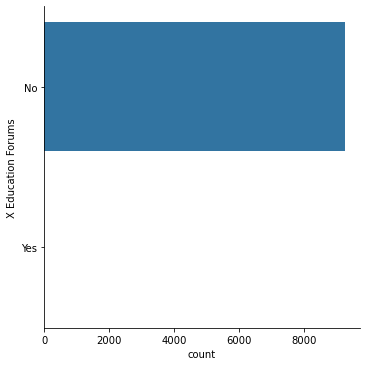

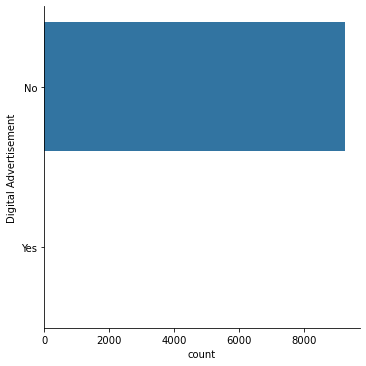

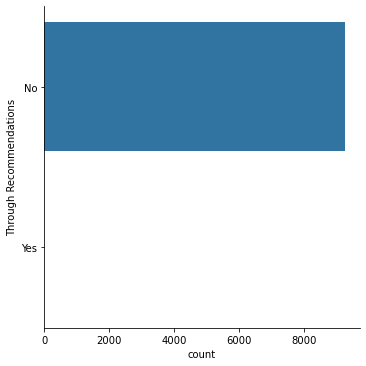

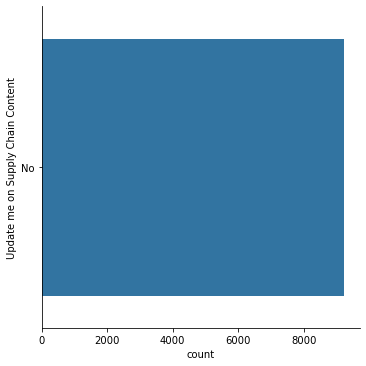

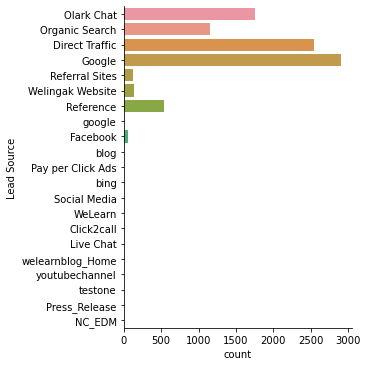

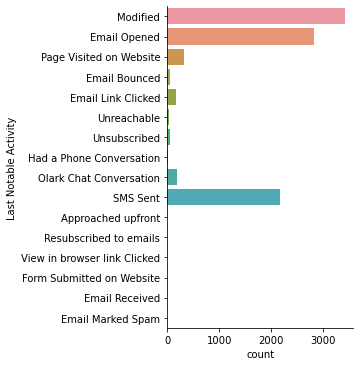

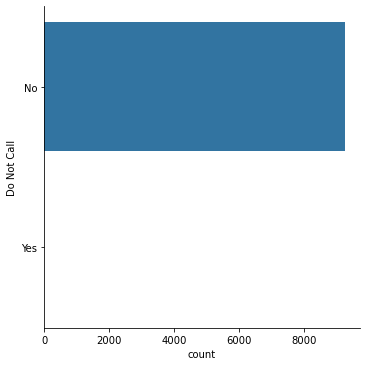

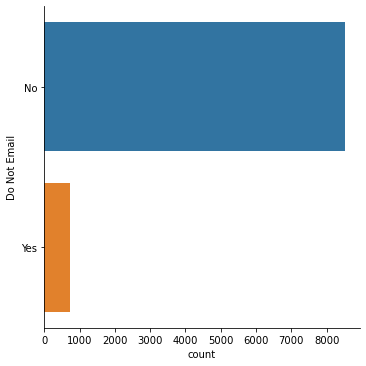

In [33]:
# Univariate Analysis of Numerical Columns
for c in categorical_column:
  cat_col_univariate_analysis(c)

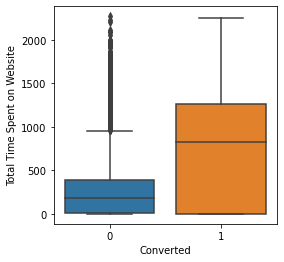

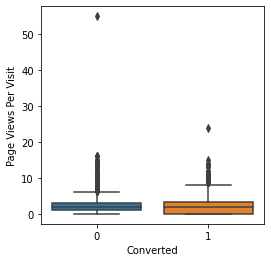

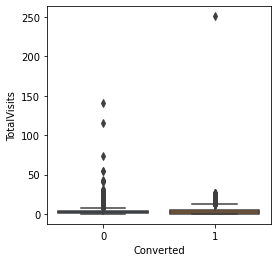

In [34]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_bivariate_analysis('Converted',c)

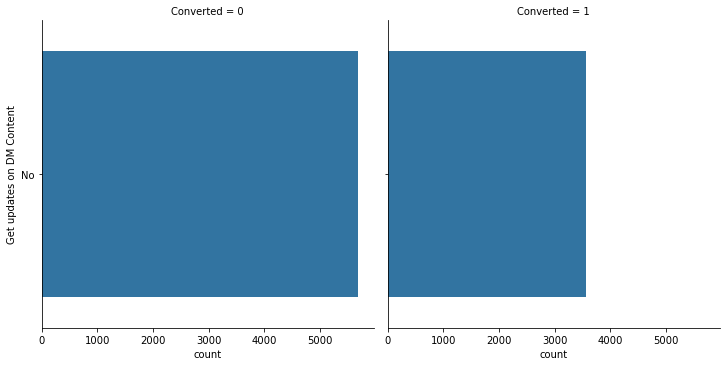

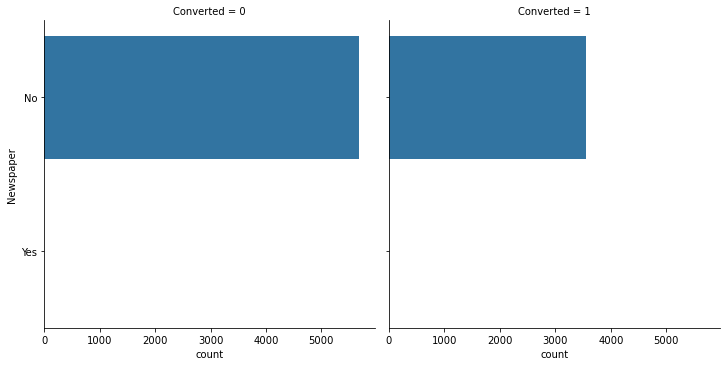

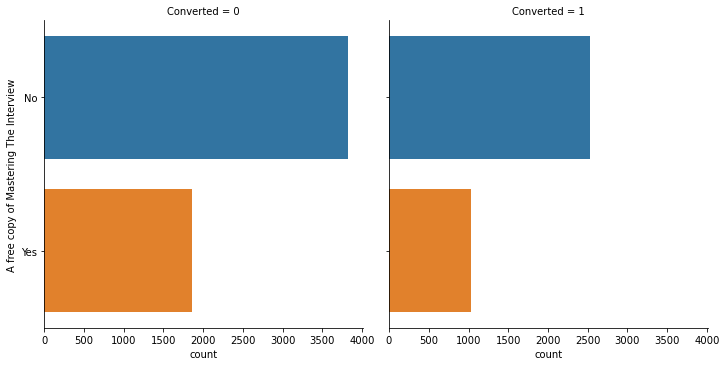

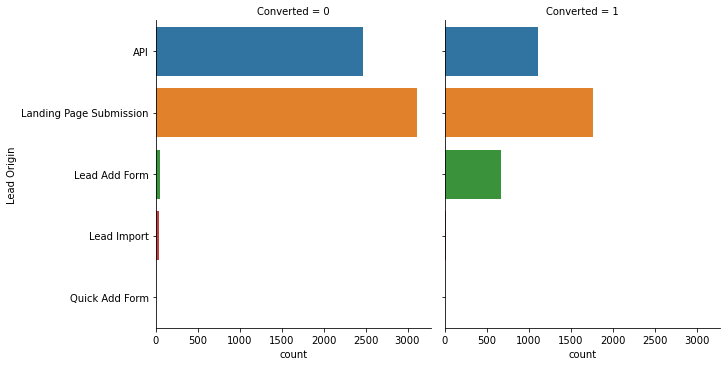

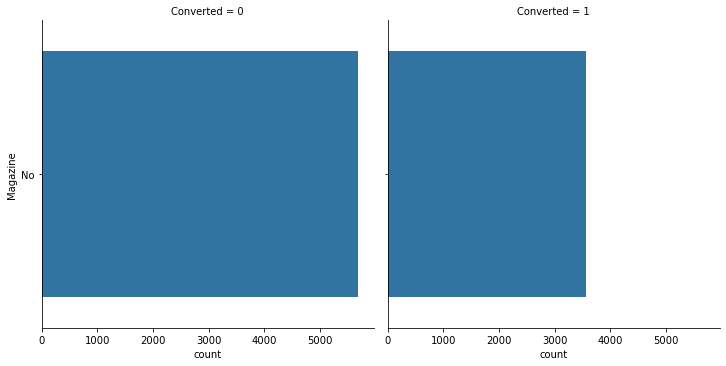

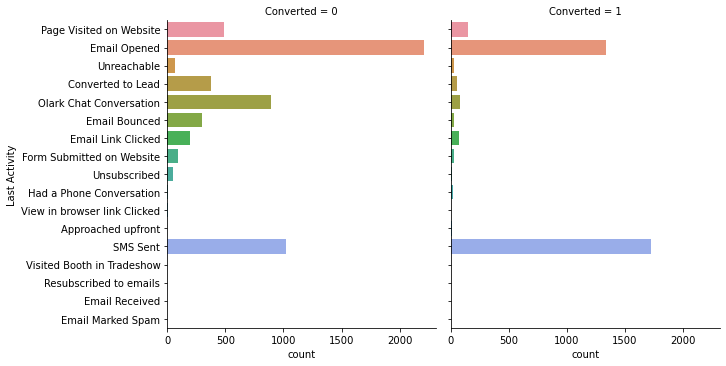

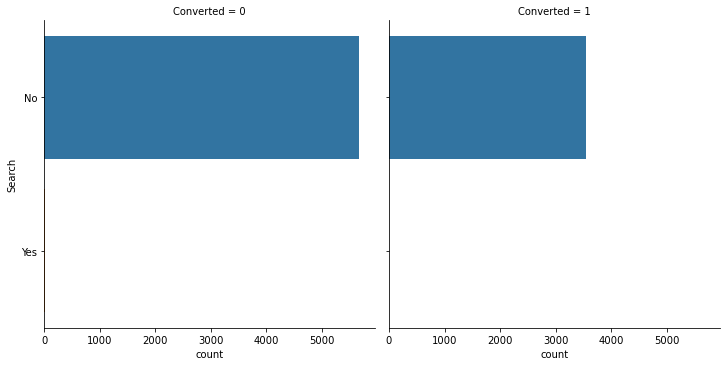

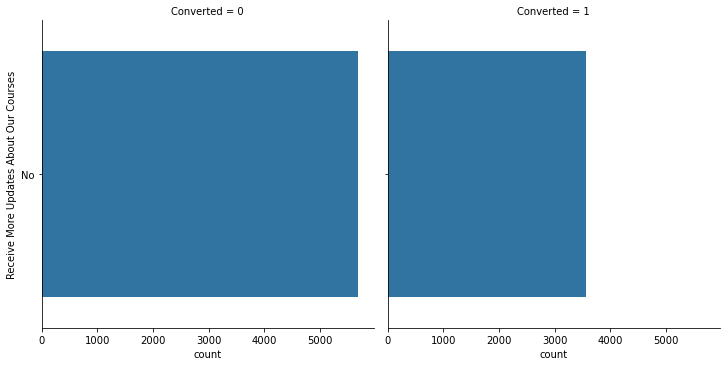

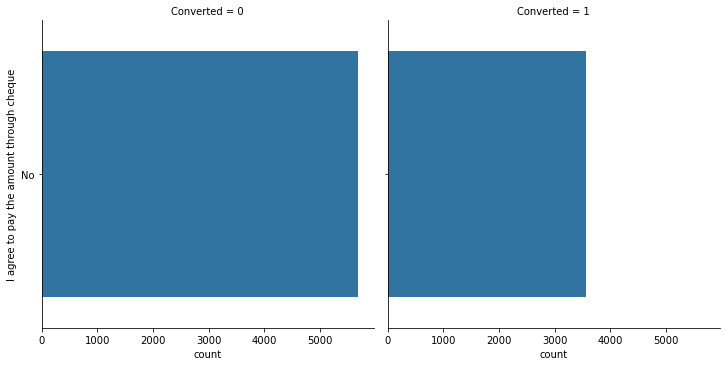

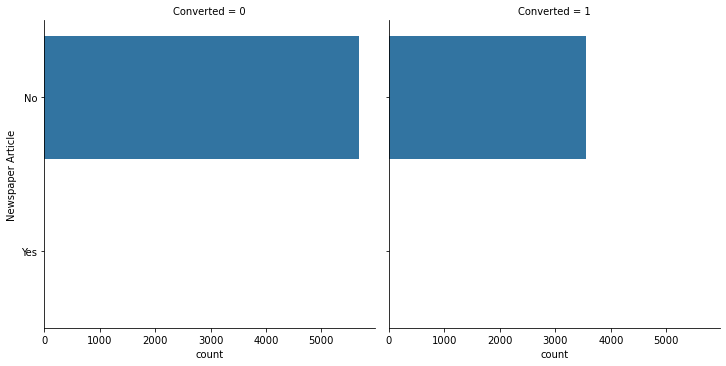

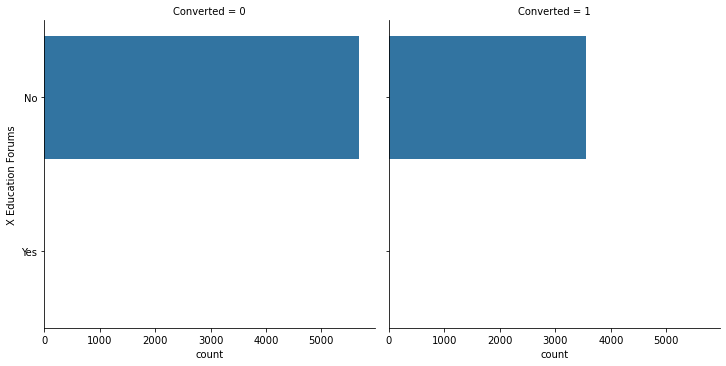

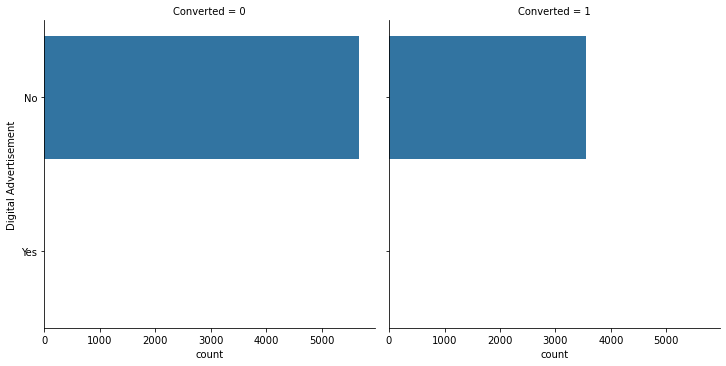

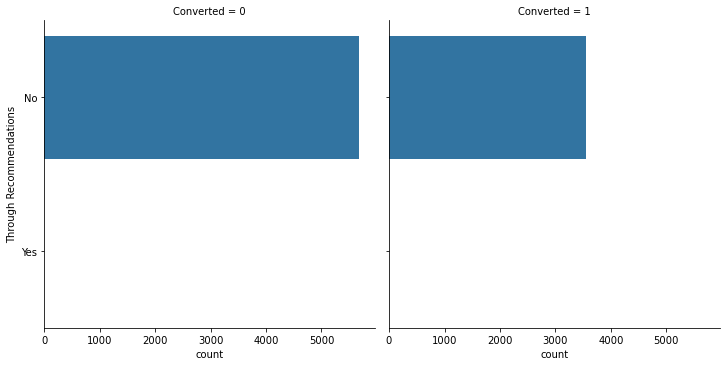

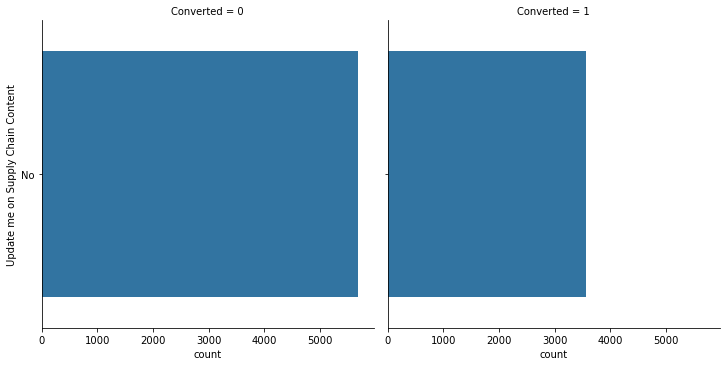

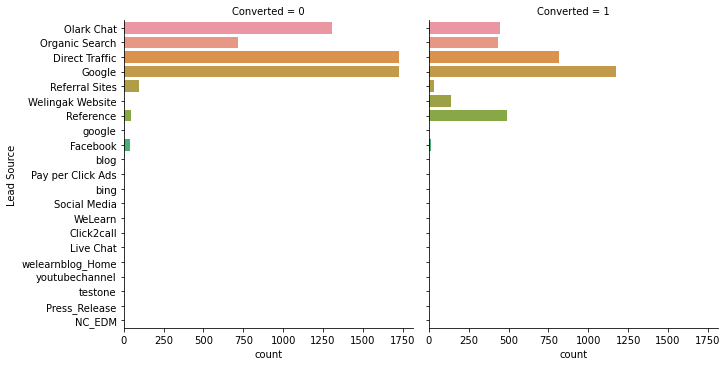

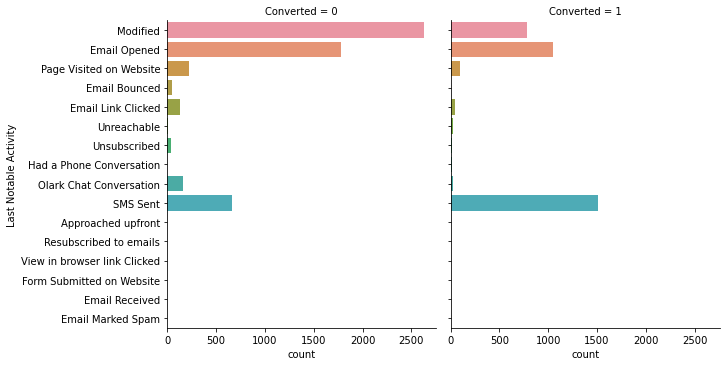

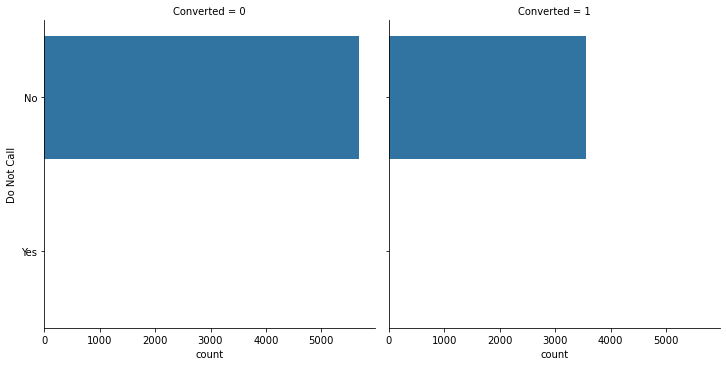

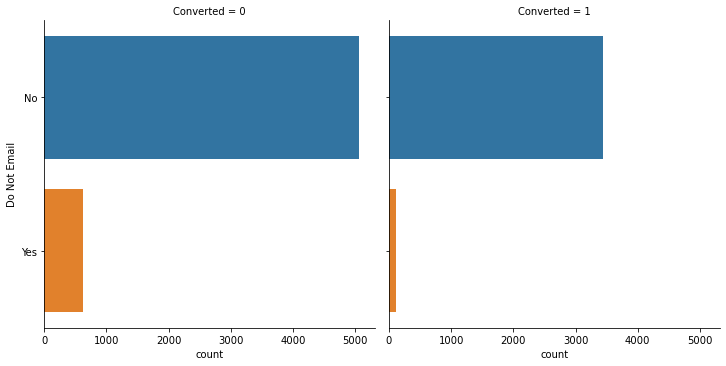

In [35]:
# Bivariate Analysis of Categorical Columns
for c in categorical_column:
  cat_col_bivariate_analysis('Converted',c)

<AxesSubplot:>

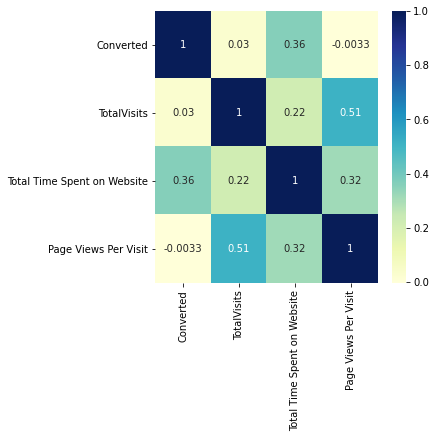

In [36]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(5, 5))
sns.heatmap(leadscore_data.corr(), cmap="YlGnBu",annot=True)

#### Summary: Upon observing numerous plots above in EDA (I), we conclude the following points:

#### Univariate Analysis Conclusion:

#### 1.There is low variation in Page Views Per Visit and TotalVisits but higher variation in Total Time Spent on Website
#### 2.There are a lot of outliers in Page Views Per Visit and TotalVisits which needs to be treated before modelling

##### Bivariate Analysis Conclusion:
#### 1.There is positive correlation between Total Time Spent on Website and Conversion
#### 2.There is come correlation between Conversion and some categorical columns like Lead Origin and Lead Source

#### Correlation Analysis (Heatmap) Conclusion:

#### 1.There is positive correlation between Total Time Spent on Website and Conversion
#### 2.There is almost no correlation in Page Views Per Visit and TotalVisits with Conversion


### Dummy variables creation

In [37]:
# Listing out columns for creating dummy variables
leadscore_data[list(categorical_column)].describe()

,Get updates on DM Content,Newspaper,A free copy of Mastering The Interview,Lead Origin,Magazine,Last Activity,Search,Receive More Updates About Our Courses,I agree to pay the amount through cheque,Newspaper Article,X Education Forums,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Lead Source,Last Notable Activity,Do Not Call,Do Not Email
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,1,2,2,5,1,17,2,1,1,2,2,2,2,1,21,16,2,2
top,No,No,No,Landing Page Submission,No,Email Opened,No,No,No,No,No,No,No,No,Google,Modified,No,No
freq,9240,9239,6352,4886,9240,3540,9226,9240,9240,9238,9239,9236,9233,9240,2904,3407,9238,8506


In [38]:
# Creating dummy varaiables and drop_first to avoid multicollinearity
leadscore_data = pd.get_dummies(data=leadscore_data, columns=list(categorical_column), drop_first=True)
del categorical_column
leadscore_data_usable_columns = set(leadscore_data.columns)

In [41]:
# Overview of Dataframe (Shape, Datatype)
print(f'Shape of Data: {leadscore_data.shape}', end="\n\n")
print('Information of Data')
print(f'{leadscore_data.info()}', end="\n\n")


Shape of Data: (9240, 68)

Information of Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   Converted                                           int64  
 1   TotalVisits                                         float64
 2   Total Time Spent on Website                         int64  
 3   Page Views Per Visit                                float64
 4   Newspaper_Yes                                       uint8  
 5   A free copy of Mastering The Interview_Yes          uint8  
 6   Lead Origin_Landing Page Submission                 uint8  
 7   Lead Origin_Lead Add Form                           uint8  
 8   Lead Origin_Lead Import                             uint8  
 9   Lead Origin_Quick Add Form                          uint8  
 10  Last Activity_Converted to Lead                     uint8  
 

In [42]:
# Overview of Dataframe (Description, % of NaN) 
print('Description of Data')
print(f'{leadscore_data.describe()}', end="\n\n")
print('Percentage of null values per column')
round(100*(leadscore_data.isnull().sum()/len(leadscore_data.index)),2)

Description of Data
         Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Newspaper_Yes  A free copy of Mastering The Interview_Yes  Lead Origin_Landing Page Submission  \
count  9240.000000  9240.000000                  9240.000000           9240.000000    9240.000000                                 9240.000000                          9240.000000   
mean      0.385390     3.445238                   487.698268              2.362820       0.000108                                    0.312554                             0.528788   
std       0.486714     4.818723                   548.021466              2.145333       0.010403                                    0.463559                             0.499198   
min       0.000000     0.000000                     0.000000              0.000000       0.000000                                    0.000000                             0.000000   
25%       0.000000     1.000000                    12.000000          

Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
Newspaper_Yes                                         0.0
                                                     ... 
Last Notable Activity_Unreachable                     0.0
Last Notable Activity_Unsubscribed                    0.0
Last Notable Activity_View in browser link Clicked    0.0
Do Not Call_Yes                                       0.0
Do Not Email_Yes                                      0.0
Length: 68, dtype: float64

### Bivariate Analysis

In [43]:
def bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=leadscore_data, kind="count", height=2)
  plt.show()

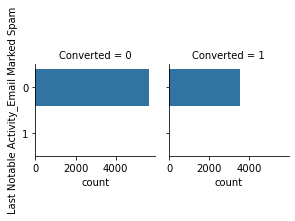

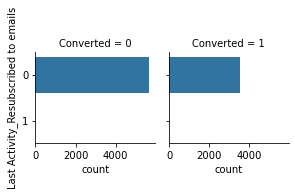

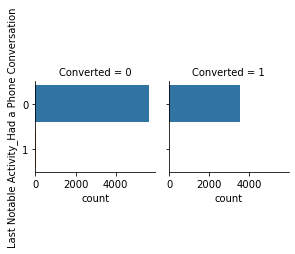

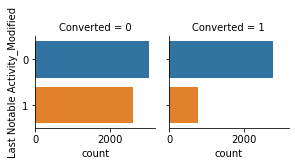

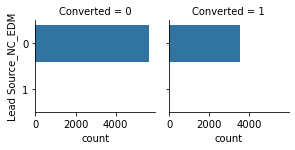

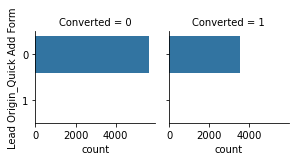

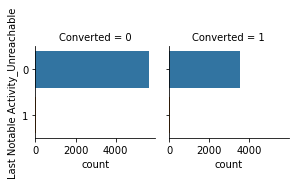

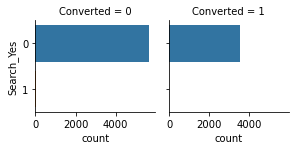

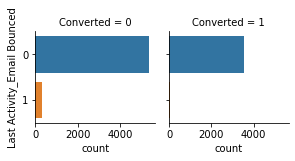

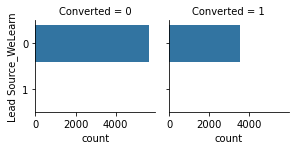

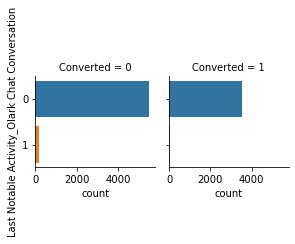

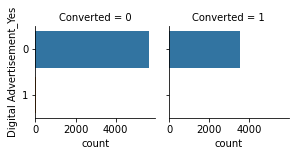

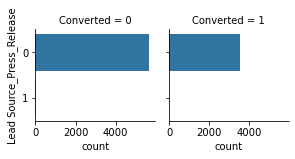

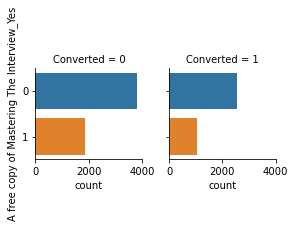

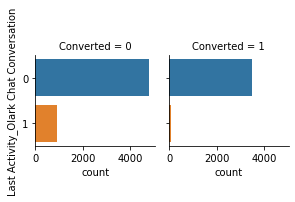

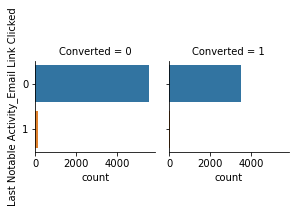

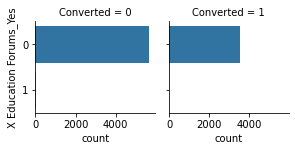

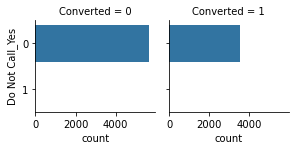

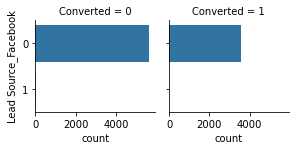

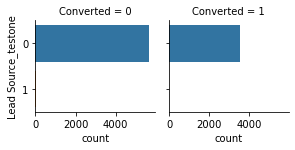

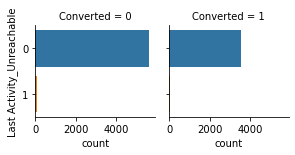

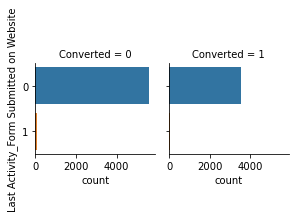

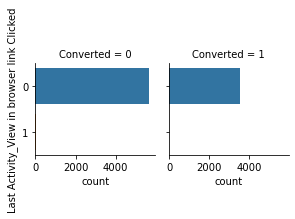

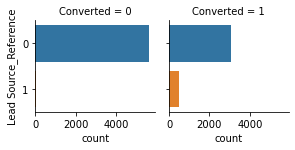

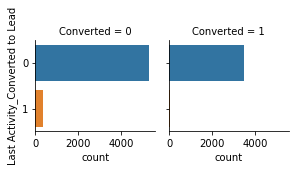

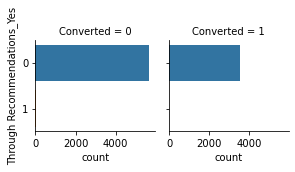

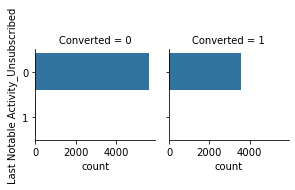

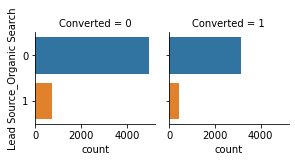

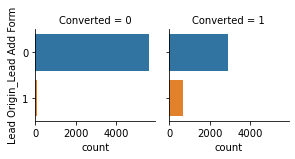

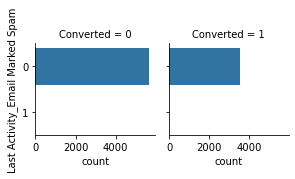

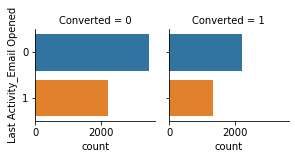

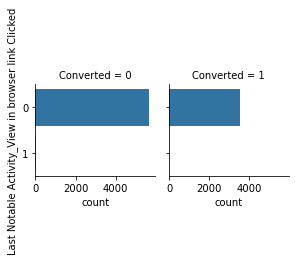

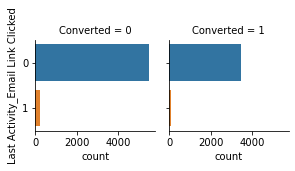

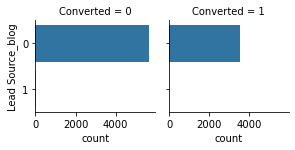

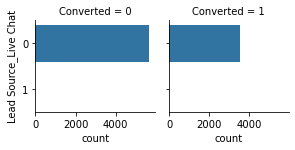

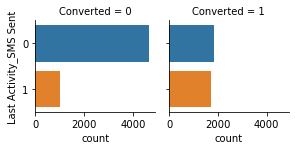

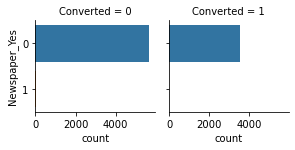

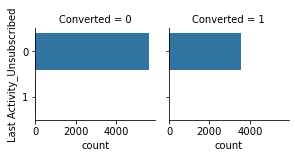

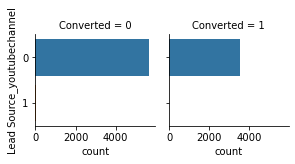

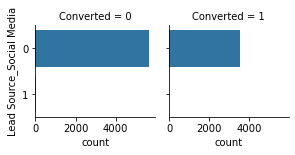

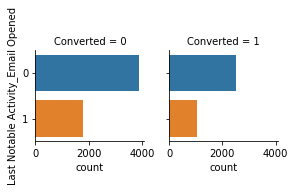

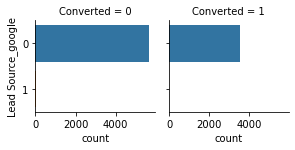

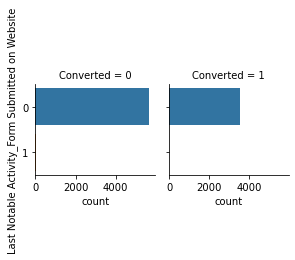

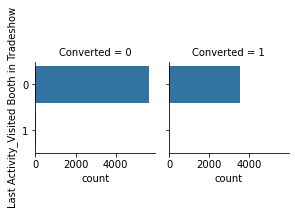

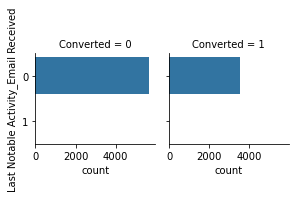

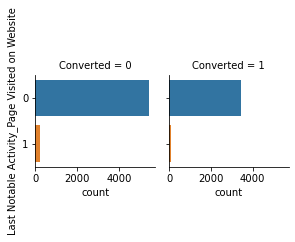

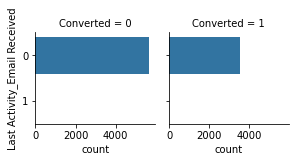

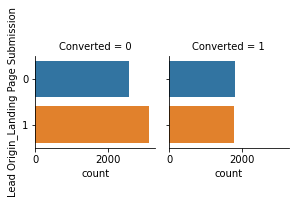

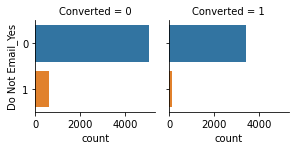

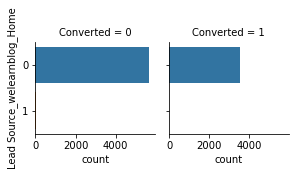

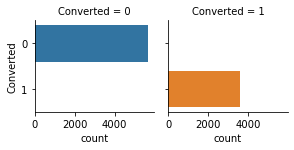

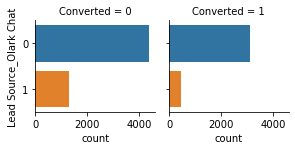

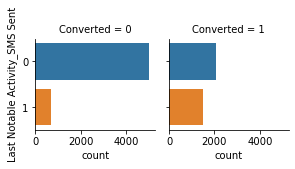

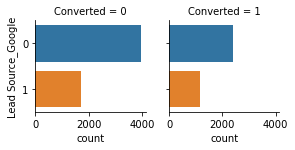

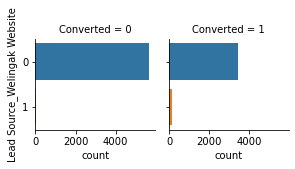

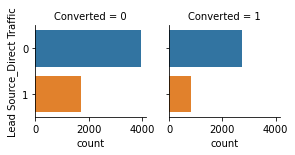

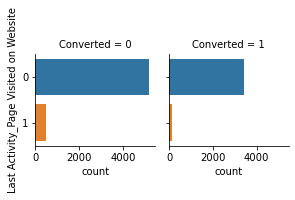

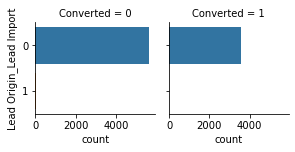

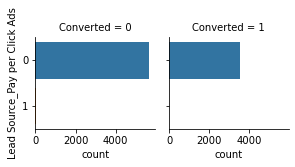

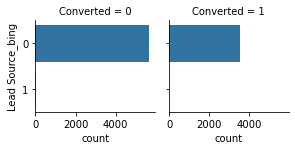

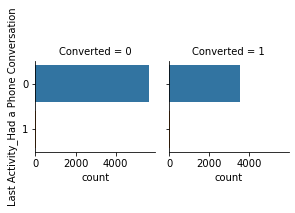

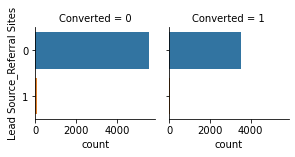

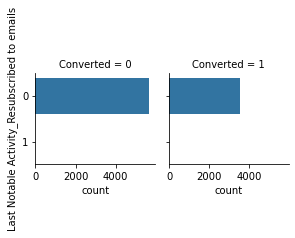

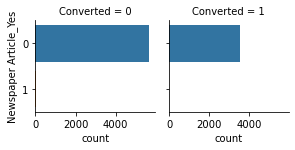

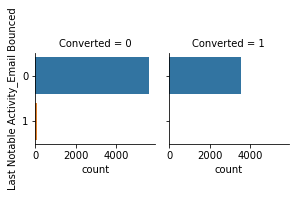

In [45]:
for c in leadscore_data_usable_columns - numerical_column:
  bivariate_analysis('Converted',c)

<AxesSubplot:>

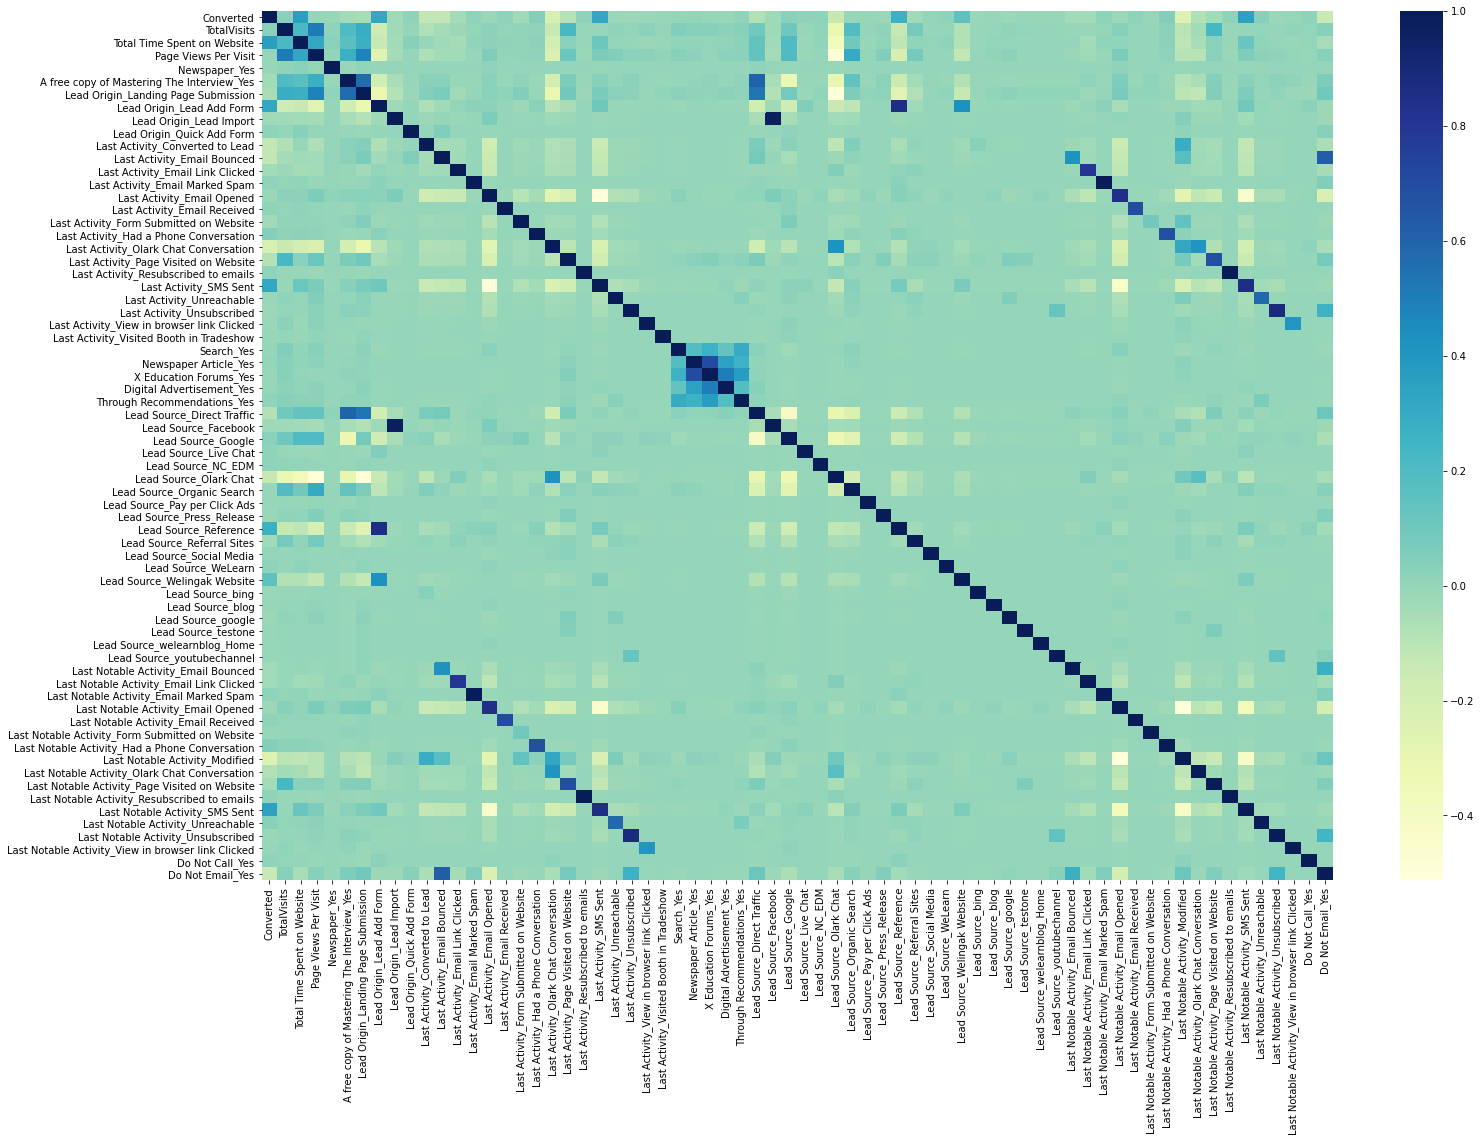

In [47]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(24, 16))
sns.heatmap(leadscore_data.corr(), cmap="YlGnBu")

In [51]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
z = np.abs(stats.zscore(leadscore_data))
# Outlier Records
leadscore_data_outliers = leadscore_data[(z > 3).any(axis=1)]
# Outlier Removed Records
leadscore_data_non_outliers = leadscore_data[(z < 3).all(axis=1)]
leadscore_data_non_outliers.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Newspaper_Yes,A free copy of Mastering The Interview_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,...,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Call_Yes,Do Not Email_Yes
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,1,2.0,1640,2.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Standardization

In [52]:
# Normalising continuous features (numerical columns)
df = leadscore_data_non_outliers[list(numerical_column)]
normalized_df=(df-df.mean())/df.std()
leadscore_data_non_outliers.drop(columns=numerical_column,axis=1,inplace=True)
leadscore_data_normal_non_outliers = pd.concat([leadscore_data_non_outliers,normalized_df],axis=1)

print(f'Percentage of data retained: {100*(leadscore_data_normal_non_outliers.shape[0]/leadscore_data.shape[0]):.2}')
leadscore_data_normal_non_outliers.head()

Percentage of data retained: 6.4e+01


,Converted,Newspaper_Yes,A free copy of Mastering The Interview_Yes,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Search_Yes,Newspaper Article_Yes,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Call_Yes,Do Not Email_Yes,Total Time Spent on Website,Page Views Per Visit,TotalVisits
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.266351,0.049739,0.630229
2,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.799067,-0.222027,-0.464523
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.937672,-1.309092,-1.194358
6,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.991997,-0.222027,-0.464523
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.937672,-1.309092,-1.194358


### Splitting Data into Training and Test Sets

In [53]:
# Putting feature variable to X
X = leadscore_data_normal_non_outliers.drop(['Converted'],axis=1)
# Putting response variable to y
y = leadscore_data_normal_non_outliers['Converted']

y.head()

1    0
2    1
5    0
6    1
7    0
Name: Converted, dtype: int64

In [56]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3)

### Building Model : Feature Selection using RFE for Logistic Regression

In [57]:
# Running RFE with the output number of the variable equal to 25
logreg = LogisticRegression(C=1e-5,max_iter=50)
rfe = RFE(logreg, 25) 
rfe = rfe.fit(X,y)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)

[False  True  True False  True  True  True  True  True False  True False
 False False  True False False  True False False False False False False
 False False False  True False  True False False  True  True  True  True
 False  True False False False  True  True False False False False False
 False False  True False False False  True False False False  True False
 False False False False  True  True  True]


In [58]:
# Ranking of columns with respect to ranking
print(rfe.ranking_)

[43  1  1  2  1  1  1  1  1  4  1  7  9 11  1 19 21  1 25 27 29 31 33 35
 37 39 41  1 22  1 12 14  1  1  1  1  3  1  6  8 10  1  1 16 24 26 28 30
 32 34  1 38 40 42  1 36 15 18  1 20 23 17 13  5  1  1  1]


In [59]:
# We are listing out the top 25 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['A free copy of Mastering The Interview_Yes', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_bing', 'Lead Source_blog', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits'],
      dtype='object')

In [60]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
def build_lr_model(col):
  print(f'Columns Count : {len(col)}')
  print(f'Columns : {col}')
  print('='*78)
  
  # Running the model using the selected variables
  X_train_sm = sm.add_constant(X_train[col])
  logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logm4.fit()
  print(res.summary())
  
  # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
  print(f'Computing VIF values to keep track of multicollinearity')
  print('='*78)
  vif = pd.DataFrame()
  vif['Features'] = X_train[col].columns
  vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif, end='\n'+'='*78+'\n')
  
  # Getting the predicted values on the train set
  y_train_pred = res.predict(X_train_sm).values.reshape(-1)
  
  # Creating a dataframe with the actual churn flag and the predicted probabilities
  y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
  y_train_pred_final['Lead_ID'] = y_train.index
  y_train_pred_final.head()
  
  # Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0
  y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
  
  # Let's check the overall accuracy.
  print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
  print('='*78)
  
  # Let's take a look at the confusion matrix again 
  confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
  draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
  
def build_lr_model_advanced(col):
  
  print(f'Columns : {col}')
  print('='*78)
  
  # Running the model using the selected variables
  X_train_sm = sm.add_constant(X_train[col])
  logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logm4.fit()
  print(res.summary())
  
  # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
  print(f'Computing VIF values to keep track of multicollinearity')
  print('='*78)
  vif = pd.DataFrame()
  vif['Features'] = X_train[col].columns
  vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif, end='\n'+'='*78+'\n')
  
  # Getting the predicted values on the train set
  y_train_pred = res.predict(X_train_sm).values.reshape(-1)
  
  # Creating a dataframe with the actual churn flag and the predicted probabilities
  y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
  y_train_pred_final['Lead_ID'] = y_train.index
  y_train_pred_final.head()
  
  # Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0
  y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
  
  # Let's check the overall accuracy.
  print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
  print('='*78)
  
  # Let's take a look at the confusion matrix again 
  confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
  draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
  
  # Let's create columns with different probability cutoffs 
  numbers = [float(x)/10 for x in range(10)]
  for i in numbers:
      y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
      
  # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
  cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
  from sklearn.metrics import confusion_matrix

  num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  for i in num:
      cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
      total1=sum(sum(cm1))
      accuracy = (cm1[0,0]+cm1[1,1])/total1

      speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
      sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
      cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
  
  # Let's plot accuracy sensitivity and specificity for various probabilities.
  cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
  plt.show()
  
  # Ask for user input based on curve, for the cut-off value
  # cutoff = float(input('What should be the cut-off based on above plot (example 0.5)?'))
  print('Taking cut-off value as 0.35, from the plot above')
  cutoff = 0.35 # Taking value after observing graph
  
  y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > cutoff else 0)
  
  # Let's check the updated accuracy.
  print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)}')
  print('='*78)
  
  # Let's check the Precision Score.
  print(f'Precision Score: {precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
  print('='*78)
  
  # Let's check the Recall Score.
  print(f'Recall Score: {recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
  print('='*78)
  
  # Let's plot Precision-Recall Curve
  p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
  plt.plot(thresholds, p[:-1], "g-")
  plt.plot(thresholds, r[:-1], "r-")
  plt.show()
  # Ask for user input based on curve, for the cut-off value
  # cutoff = float(input('What should be the cut-off based on above plot (x-axis of intersection, generally)?'))
  print('Taking cut-off value as 0.42, from the plot above')
  cutoff = 0.42 # Taking value after observing graph
  
  # Making Prediction of Test Set
  X_test_sm = sm.add_constant(X_test[col])
  y_test_pred = res.predict(X_test_sm)
  y_pred_1 = pd.DataFrame(y_test_pred)
  # Converting y_test to dataframe
  y_test_df = pd.DataFrame(y_test)
  # Removing index for both dataframes to append them side by side 
  y_pred_1.reset_index(drop=True, inplace=True)
  y_test_df.reset_index(drop=True, inplace=True)
  # Appending y_test_df and y_pred_1
  y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
  # print(y_pred_final)
  # Renaming the column 
  y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Probability'})
  # Rearranging the columns
  y_pred_final = y_pred_final.reindex_axis(['Lead_ID','Converted','Conversion_Probability'], axis=1)
  y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > cutoff else 0)
  
  # Let's check the overall accuracy on Test set
  print(f'Overall accuracy on Test set: {metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)}')
  print('='*78)
  
  confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
  confusion2
  TP = confusion2[1,1] # true positive 
  TN = confusion2[0,0] # true negatives
  FP = confusion2[0,1] # false positives
  FN = confusion2[1,0] # false negatives
  # Let's see the sensitivity of our logistic regression model
  print(f'sensitivity of our logistic regression model: {TP / float(TP+FN)}')
  print('='*78)
  # Let's see the specificity of our logistic regression model
  print(f'specificity of our logistic regression model: {TN / float(TN+FP)}')
  print('='*78)

### Building Model using Logistic Regression

Columns Count : 25
Columns : ['Last Notable Activity_Modified', 'Lead Source_Olark Chat', 'Lead Origin_Quick Add Form', 'Last Activity_Converted to Lead', 'TotalVisits', 'Last Notable Activity_SMS Sent', 'Last Activity_Email Bounced', 'Lead Source_Google', 'Lead Source_Organic Search', 'Last Notable Activity_Email Opened', 'Lead Source_Press_Release', 'Lead Source_Direct Traffic', 'A free copy of Mastering The Interview_Yes', 'Last Activity_Email Opened', 'Last Activity_Email Link Clicked', 'Lead Source_blog', 'Lead Origin_Lead Import', 'Lead Source_Pay per Click Ads', 'Lead Source_bing', 'Last Activity_Olark Chat Conversation', 'Total Time Spent on Website', 'Lead Source_Referral Sites', 'Lead Origin_Landing Page Submission', 'Last Activity_SMS Sent', 'Page Views Per Visit']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4168
Model:                            GLM   Df Residuals:  

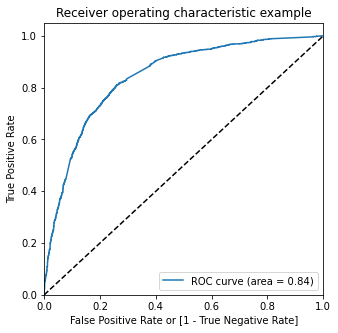

In [61]:
# Model Number 1
# Let's consider all 25 the columns suggested by RFE for our next model
selected_predictors = set(auto_selected_predictors)
removed_predictors = set()
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 25
Columns : ['Last Notable Activity_Modified', 'Lead Source_Olark Chat', 'Lead Origin_Quick Add Form', 'Last Activity_Converted to Lead', 'TotalVisits', 'Last Notable Activity_SMS Sent', 'Last Activity_Email Bounced', 'Lead Source_Google', 'Lead Source_Organic Search', 'Last Notable Activity_Email Opened', 'Lead Source_Press_Release', 'Lead Source_Direct Traffic', 'A free copy of Mastering The Interview_Yes', 'Last Activity_Email Opened', 'Last Activity_Email Link Clicked', 'Lead Source_blog', 'Lead Origin_Lead Import', 'Lead Source_Pay per Click Ads', 'Lead Source_bing', 'Last Activity_Olark Chat Conversation', 'Total Time Spent on Website', 'Lead Source_Referral Sites', 'Lead Origin_Landing Page Submission', 'Last Activity_SMS Sent', 'Page Views Per Visit']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4168
Model:                            GLM   Df Residuals:  

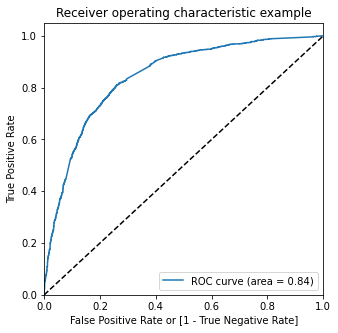

In [62]:
# Model number 2
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Resubscribed to emails')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 24
Columns : ['Last Notable Activity_Modified', 'Lead Source_Olark Chat', 'Lead Origin_Quick Add Form', 'Last Activity_Converted to Lead', 'TotalVisits', 'Last Notable Activity_SMS Sent', 'Last Activity_Email Bounced', 'Lead Source_Google', 'Lead Source_Organic Search', 'Last Notable Activity_Email Opened', 'Lead Source_Press_Release', 'A free copy of Mastering The Interview_Yes', 'Last Activity_Email Opened', 'Last Activity_Email Link Clicked', 'Lead Source_blog', 'Lead Origin_Lead Import', 'Lead Source_Pay per Click Ads', 'Lead Source_bing', 'Last Activity_Olark Chat Conversation', 'Total Time Spent on Website', 'Lead Source_Referral Sites', 'Lead Origin_Landing Page Submission', 'Last Activity_SMS Sent', 'Page Views Per Visit']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4168
Model:                            GLM   Df Residuals:                     4154
Model 

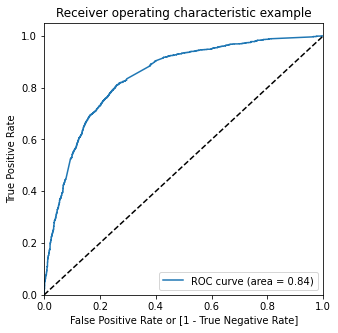

In [63]:
# Model Number 3
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Direct Traffic')
build_lr_model(list(selected_predictors-removed_predictors))

## Final Model Building and Analysis

Columns : ['Last Notable Activity_Modified', 'Lead Source_Olark Chat', 'Lead Origin_Quick Add Form', 'Last Activity_Converted to Lead', 'TotalVisits', 'Last Notable Activity_SMS Sent', 'Last Activity_Email Bounced', 'Lead Source_Google', 'Lead Source_Organic Search', 'Last Notable Activity_Email Opened', 'Lead Source_Press_Release', 'A free copy of Mastering The Interview_Yes', 'Last Activity_Email Opened', 'Last Activity_Email Link Clicked', 'Lead Source_blog', 'Lead Origin_Lead Import', 'Lead Source_Pay per Click Ads', 'Lead Source_bing', 'Last Activity_Olark Chat Conversation', 'Total Time Spent on Website', 'Lead Source_Referral Sites', 'Lead Origin_Landing Page Submission', 'Last Activity_SMS Sent', 'Page Views Per Visit']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4168
Model:                            GLM   Df Residuals:                     4154
Model Family:            

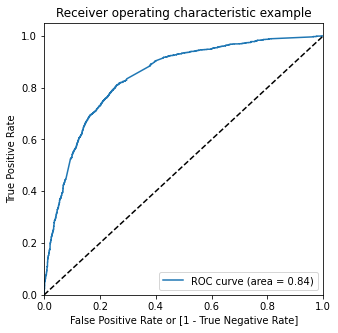

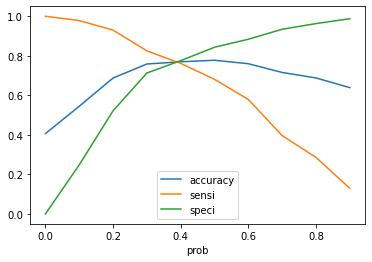

Taking cut-off value as 0.35, from the plot above
Overall accuracy: 0.7679942418426103
Precision Score: 0.7482154445165476
Recall Score: 0.681039574719433


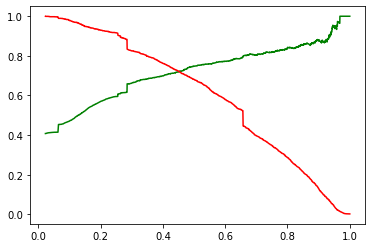

Taking cut-off value as 0.42, from the plot above


AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [67]:
# Building model again, and obtaining additional parameters like cut-off
# Making predictions on Test set using this final model
build_lr_model_advanced(list(selected_predictors-removed_predictors))

<AxesSubplot:>

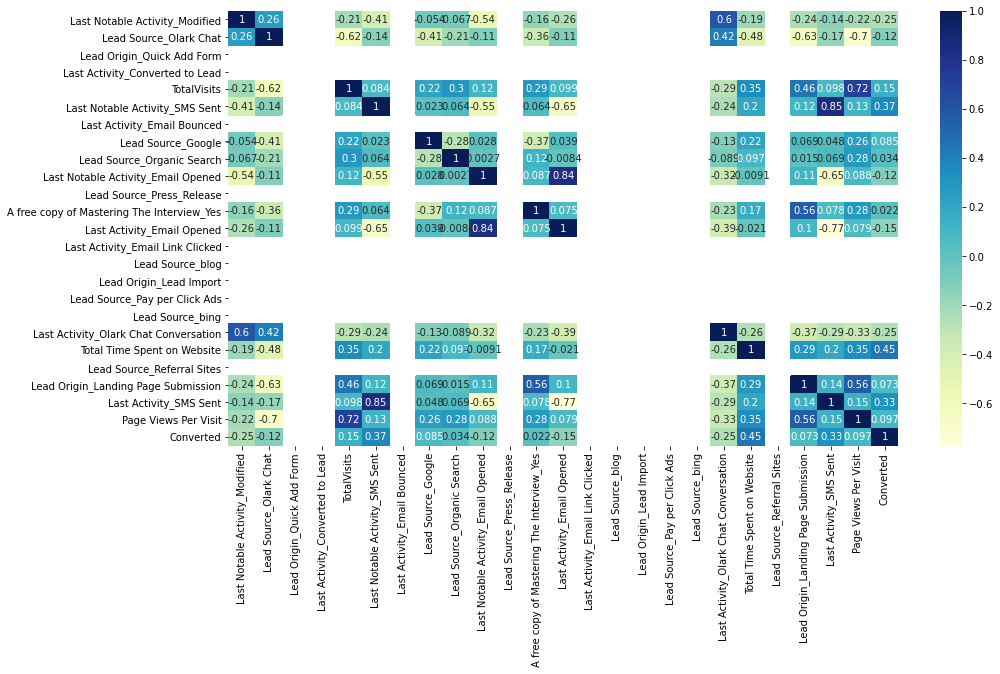

In [66]:
# Analysis of columns in our final model w.r.t. 'Converted'
col = list(selected_predictors-removed_predictors)
col.append('Converted')
plt.figure(figsize=(15, 8))
sns.heatmap(leadscore_data_normal_non_outliers[col].corr(), cmap="YlGnBu",annot=True)

## Verifying if sufficient accuracy is achieved using Logistic Regression
### Building Model Using PCA to Verify Model Accuracy


In [68]:
#Initializing the PCA module
pca = PCA(svd_solver='randomized', random_state=100)

In [70]:

#Doing the PCA on the train data
pca.fit(leadscore_data_normal_non_outliers)

PCA(random_state=100, svd_solver='randomized')

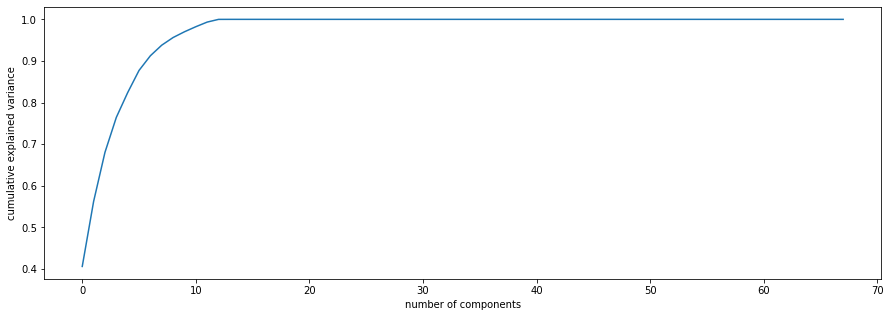

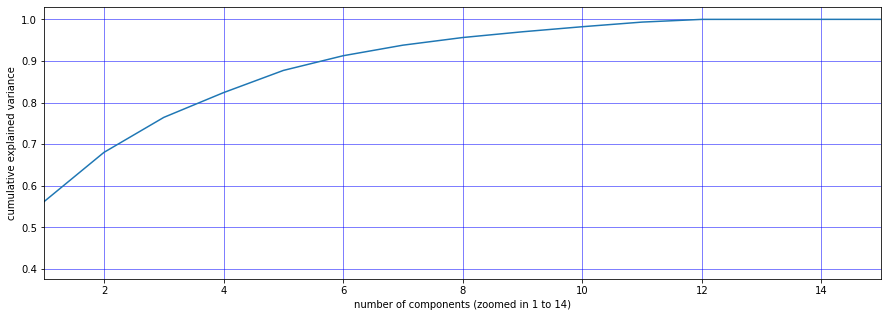

In [71]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (15,5))
ax = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

fig = plt.figure(figsize = (15,5))
ax = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components (zoomed in 1 to 14)')
plt.ylabel('cumulative explained variance')
plt.grid(color='b', linestyle='-', linewidth=.5)
plt.xlim(1,15)
plt.show()

### Performing PCA (Moderate Accuracy) with 75% Variance Cut-off¶
#### USE CASE: This could help us identify larger number of probable hot leads and thus we can focus on larger audience, if we have bigger team to contact to hot leads individually on telephone calls.

In [72]:
X_train.shape

(4168, 67)

In [73]:
# Since our dataset is large enough, we will use incremental PCA
pca_moderate = PCA(0.75)

In [74]:
leadscore_train_pca_moderate = pca_moderate.fit_transform(X_train)
leadscore_train_pca_moderate.shape

(4168, 4)

In [75]:
# Training the Regression Model
learner_pca_moderate = LogisticRegression()
model_pca_lr_moderate = learner_pca_moderate.fit(leadscore_train_pca_moderate,y_train)

In [76]:
leadscore_test_pca_moderate = pca_moderate.transform(X_test)
leadscore_test_pca_moderate.shape

(1787, 4)

In [78]:
#Making prediction on the test data
pred_proba_test_moderate = model_pca_lr_moderate.predict_proba(leadscore_test_pca_moderate)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_proba_test_moderate))

'0.78'

### Performing PCA (High Accuracy) with 90% Variance Cut-Off

In [79]:
X_train.shape

(4168, 67)

In [80]:
# Since our dataset is large enough, we will use incremental PCA
pca_high = PCA(0.90)

In [81]:
leadscore_train_pca_high = pca_high.fit_transform(X_train)
leadscore_train_pca_high.shape
# PCA selected 7 components to explain 90% variance in data

(4168, 7)

In [83]:
# Training the Regression Model
learner_pca_high = LogisticRegression()
model_pca_lr_high = learner_pca_high.fit(leadscore_train_pca_high,y_train)

In [84]:
leadscore_test_pca_high = pca_high.transform(X_test)
leadscore_test_pca_high.shape

(1787, 7)

In [85]:
#Making prediction on the test data
pred_proba_test_high = model_pca_lr_high.predict_proba(leadscore_test_pca_high)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_proba_test_high))

'0.83'

## Conclusions

#### Our Logistic Regression Model is decent and accurate enough, when compared to the model derived using PCA.
#### Education Company needs to py attention to following key aspects to improve the overall conversion rate:
#### a. Increase user engagement on their website since this helps in higher conversion
#### b. Increase on sending SMS notifications since this helps in higher conversion
#### c. Get TotalVisits increased by advertising etc. since this helps in higher conversion
#### d. They can improve the Olark Chat service since this is affecting the conversion negatively